<a href="https://colab.research.google.com/github/Anirudh1905/American-Sign-Language/blob/master/American_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASL Sign Language

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well. 

## Importing the Data

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sign_mnist_test.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


## Exploratory Data Analysis

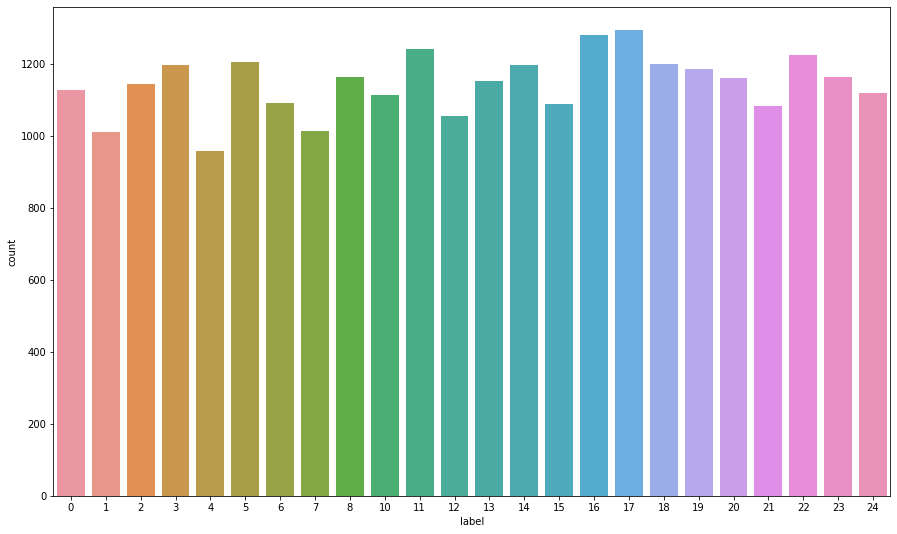

In [3]:
plt.figure(figsize = (15,9)) 
# Label Count
sns.countplot(train_df['label'])
plt.show()

In [4]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [6]:
x_train = train_df.values
x_test = test_df.values

In [7]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255
x_train.shape

(27455, 784)

In [8]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [9]:
x_train.shape
x_test.shape

(7172, 28, 28, 1)

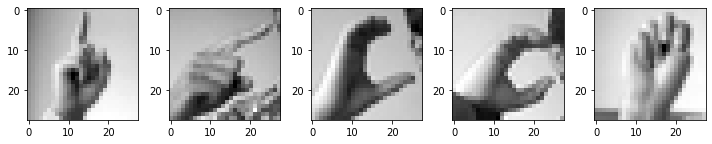

In [10]:
f, ax = plt.subplots(1,5) 
f.set_size_inches(10, 10)
k = 0
for j in range(5):
    ax[j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
    k += 1
    plt.tight_layout()  

## Data Augmentation

In [11]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1)
train_datagen.fit(x_train)

In [12]:
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=1):
      print("\nReached 100% accuracy so cancelling training!")
      self.model.stop_training = True
cb=myCallback()

## CNN Model

In [14]:
model = Sequential([Conv2D(75,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)),
                    BatchNormalization(),
                    MaxPool2D((2,2),strides=2,padding='same'),
                    Conv2D(50,(3,3),strides=1,padding='same',activation='relu'),
                    Dropout(0.2),
                    BatchNormalization(),
                    MaxPool2D((2,2),strides=2,padding='same'),
                    Conv2D(25,(3,3),strides=1,padding='same',activation='relu'),
                    BatchNormalization(),
                    MaxPool2D((2,2),strides=2,padding='same'),
                    Flatten(),
                    Dense(512,activation='relu'),
                    Dropout(0.3),
                    Dense(24,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)         

In [15]:
history = model.fit(train_datagen.flow(x_train,y_train,batch_size=128),
                    epochs=20,
                    validation_data=(x_test,y_test),
                    callbacks=[lr_reduction,cb])

Epoch 1/20
215/215 [==============================] - 111s 518ms/step - loss: 1.0945 - accuracy: 0.6570 - val_loss: 3.3870 - val_accuracy: 0.1666
Epoch 2/20
215/215 [==============================] - 111s 516ms/step - loss: 0.2176 - accuracy: 0.9281 - val_loss: 1.2940 - val_accuracy: 0.5700
Epoch 3/20
215/215 [==============================] - 112s 521ms/step - loss: 0.1076 - accuracy: 0.9655 - val_loss: 0.3027 - val_accuracy: 0.8945
Epoch 4/20
215/215 [==============================] - 113s 524ms/step - loss: 0.0656 - accuracy: 0.9788 - val_loss: 0.1564 - val_accuracy: 0.9520
Epoch 5/20
215/215 [==============================] - 113s 524ms/step - loss: 0.0480 - accuracy: 0.9839 - val_loss: 0.0692 - val_accuracy: 0.9789
Epoch 6/20
215/215 [==============================] - 112s 522ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0345 - val_accuracy: 0.9905
Epoch 7/20
215/215 [==============================] - 112s 523ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0408 -

## Model Evaluation

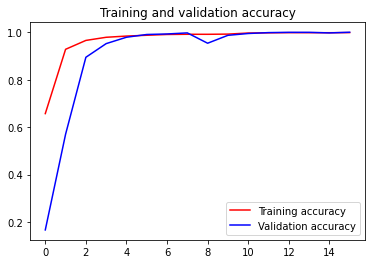

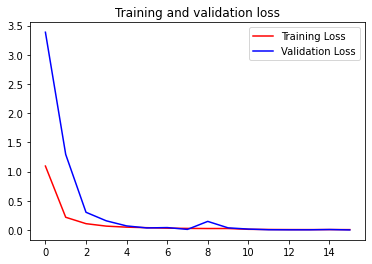

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model Prediction

In [17]:
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sign_mnist_test.csv")
y = test['label']

In [18]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
      predictions[i] += 1

predictions[:5]    

array([ 6,  5, 10,  0,  3])

In [25]:
d={}
for i in range(0,26):
  d[i]=chr(65+i)

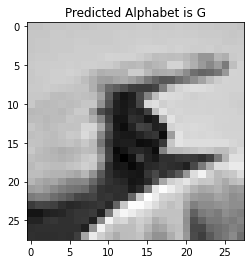

In [26]:
plt.imshow(x_test[0].reshape(28,28), cmap="gray", interpolation='none')
plt.title("Predicted Alphabet is {}".format(d[predictions[0]]))
plt.show()